<a href="https://colab.research.google.com/github/PawanPPatil/F4F/blob/main/Question3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving DBH.xlsx to DBH (4).xlsx
Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tree species     200 non-null    object 
 1   TreeHeight_foot  200 non-null    int64  
 2   TreeCrown_foot   200 non-null    float64
 3   TreeDBH_cm       200 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.4+ KB
None

First 5 Rows:
   Tree species  TreeHeight_foot  TreeCrown_foot  TreeDBH_cm
0        Lemon                6             4.5    6.687898
1        Lemon                6             4.0    7.002817
2        Lemon                5             4.0    6.366198
3        Lemon                7             5.0    7.002817
4        Lemon                5             4.0    8.594367

Missing Values:
 Tree species       0
TreeHeight_foot    0
TreeCrown_foot     0
TreeDBH_cm         0
dtype: int64
Fitting 5 f

<ipython-input-5-61d28163b9a7>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


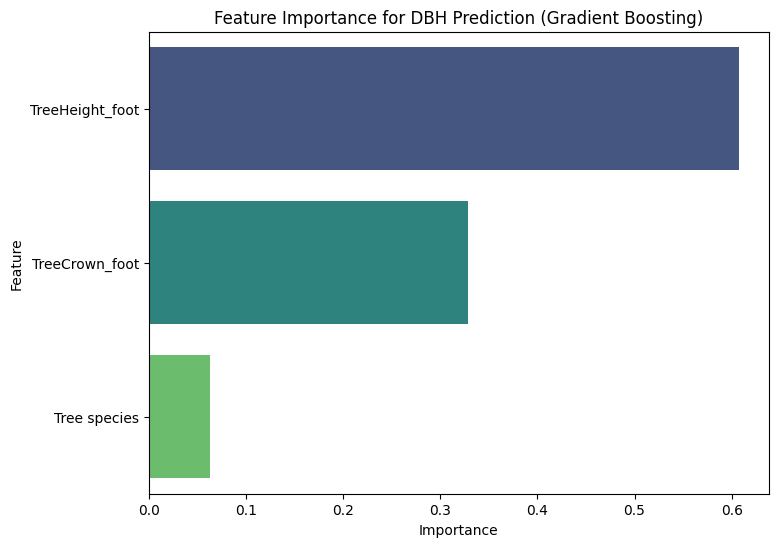

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Model Performance:
MSE: 10.62, R2 Score: 0.50


<ipython-input-5-61d28163b9a7>:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, palette='viridis')


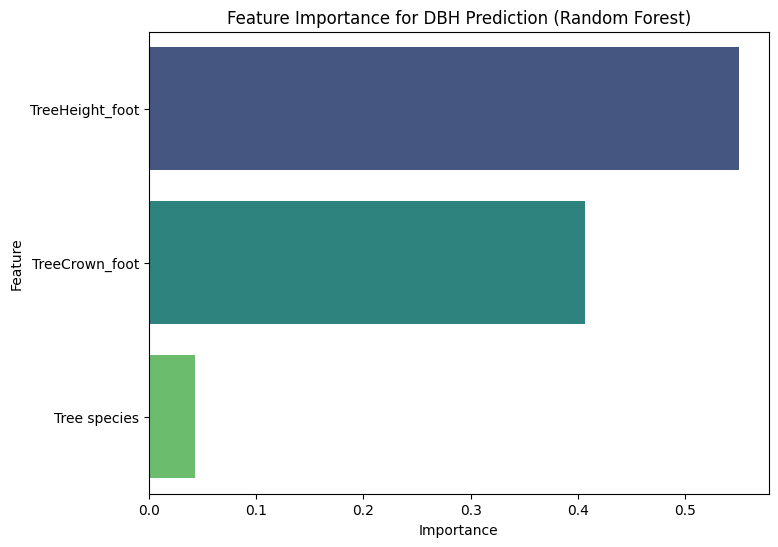


Models and Scalers saved successfully!


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Read the file after upload
df = pd.read_excel('DBH.xlsx')

# Display dataset overview
print("Dataset Overview:\n")
print(df.info())
print("\nFirst 5 Rows:\n", df.head())

# Handling Missing Values (if any)
print("\nMissing Values:\n", df.isnull().sum())
# df.fillna(df.mean(), inplace=True)  # Filling missing numerical values with mean

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Tree species'] = le.fit_transform(df['Tree species'])

# Define the features and target
X = df[['Tree species', 'TreeHeight_foot', 'TreeCrown_foot']]
y = df['TreeDBH_cm']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training: Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV (optional but helps improve performance)
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = best_model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nGradient Boosting Model Performance:\nMSE: {mse:.2f}, R2 Score: {r2:.2f}")

# Feature Importance (to interpret the model)
feature_importances = best_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for DBH Prediction (Gradient Boosting)')
plt.show()

# ---- Random Forest Model ----

# Model Training: Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV to find the best hyperparameters for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters found by GridSearchCV for Random Forest
print(f"\nBest Parameters for Random Forest: {grid_search_rf.best_params_}")

# Train the model with the best parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"\nRandom Forest Model Performance:\nMSE: {mse_rf:.2f}, R2 Score: {r2_rf:.2f}")

# Feature Importance for Random Forest
feature_importances_rf = best_rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})

# Sort features by importance
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Plot Feature Importance for Random Forest
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, palette='viridis')
plt.title('Feature Importance for DBH Prediction (Random Forest)')
plt.show()

# Save the model and scaled features if needed
#import joblib
# joblib.dump(best_model, 'best_gradient_boosting_model.pkl')
# joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

print("\nModels and Scalers saved successfully!")
